## Fraud Analysis   

The primary aim of the fraud analysis project is to identify and mitigate fraudulent activities within a dataset of financial transactions.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('fraud.csv')

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

## Balancing Data

In [9]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

Observed large number of NotFraud cases in dataset might cause Overfitting in our model. So we have reduce the NotFraud cases to tune the dataset

In [10]:
notF = df[df.isFraud == 0].sample(8213)
isF = df[df.isFraud == 1]

In [11]:
newDf = pd.concat([isF, notF]).sort_index()
newDf.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6100658,523,TRANSFER,2135320.18,C220852922,2135320.18,0.00,C1681916503,0.00,0.00,1,0
3098051,235,PAYMENT,26593.11,C1994022545,29120.00,2526.89,M976851543,0.00,0.00,0,0
6055696,499,CASH_OUT,116530.20,C1873019648,116530.20,0.00,C636323541,1608702.22,1725232.42,1,0
248771,14,TRANSFER,1832319.42,C439830884,1832319.42,0.00,C1133002328,0.00,0.00,1,0
69202,9,CASH_OUT,1055.00,C1764109750,1055.00,0.00,C1522743169,75179.00,0.00,1,0


In [12]:
newDf.shape

(16426, 11)

In [13]:
newDf['isFraud'].value_counts()

isFraud
1    8213
0    8213
Name: count, dtype: int64

# Q. . What are the key factors that predict fraudulent customer? 

type: The type of transaction (e.g., PAYMENT, TRANSFER).<br>

amount: The transaction amount.<br>

nameOrig: The identifier of the origin account.<br>

oldbalanceOrg: The initial balance of the origin account before the transaction.<br>

newbalanceOrig: The balance of the origin account after the transaction.<br>

nameDest: The identifier of the destination account.<br>

oldbalanceDest: The initial balance of the destination account before the transaction.<br>

newbalanceDest: The balance of the destination account after the transaction.<br>

isFraud: Indicates whether the transaction is identified as fraudulent (1) or not (0).<br>

isFlaggedFraud: Indicates whether the transaction was flagged as potentially fraudulent (1) or not (0).<br>

## Data cleaning

**Checking missing values**

In [19]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No outliers present

**Finding outliers**

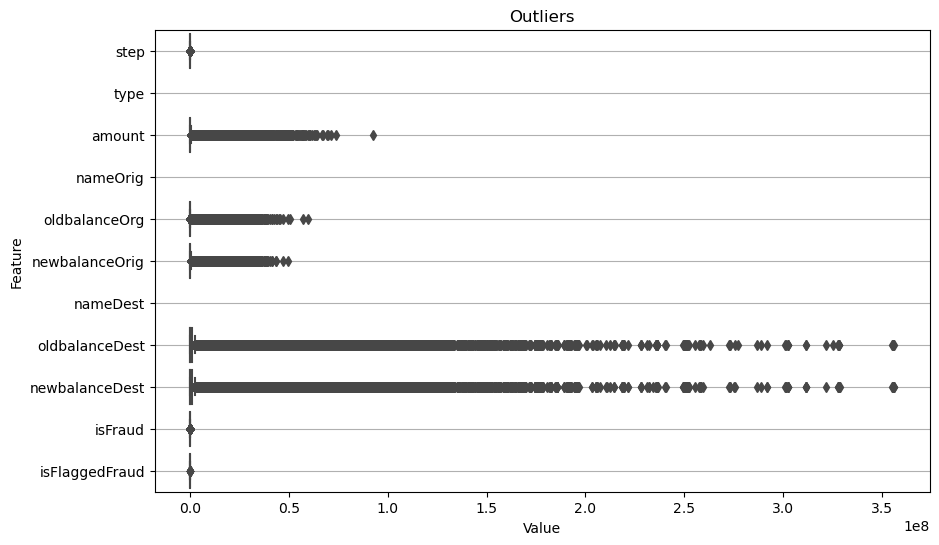

In [20]:

df1 = df.apply(pd.to_numeric, errors='coerce')


df_melted = df1.melt(var_name='Feature', value_name='Value')


plt.figure(figsize=(10, 6))
sns.boxplot(x='Value', y='Feature', data=df_melted, orient='h')
plt.title('Outliers')
plt.grid(axis='y')
plt.show()

# EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='amount', ylabel='step'>

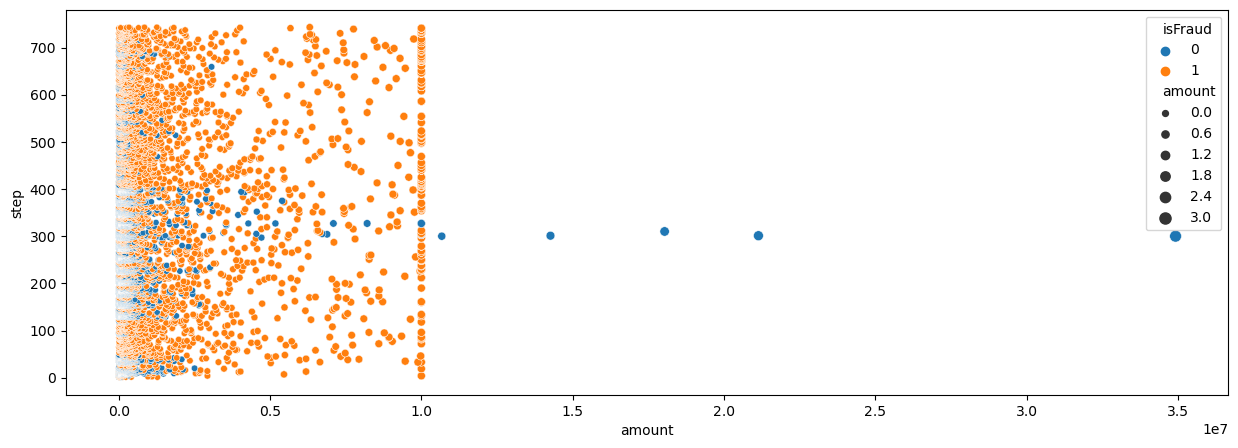

In [21]:

plt.figure(figsize=(15,5))
sns.scatterplot(data=newDf,x='amount',y='step',hue='isFraud',size='amount')

<AxesSubplot:xlabel='oldbalanceOrg', ylabel='newbalanceDest'>

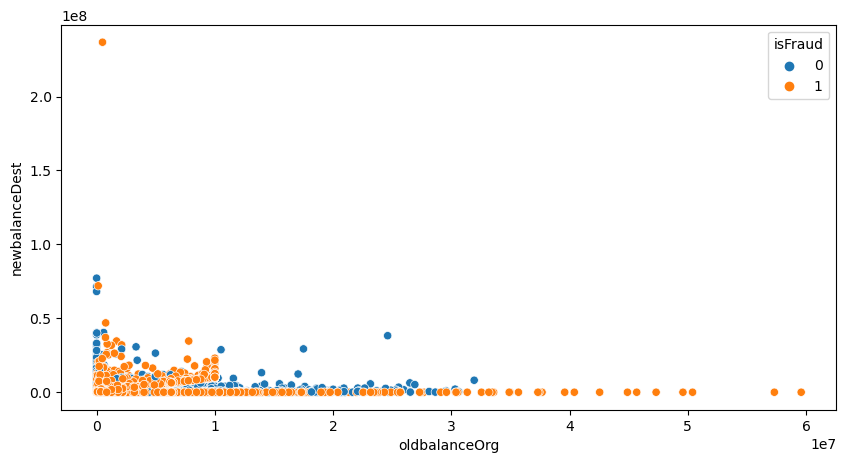

In [22]:
## Plotted relation between New Balance in Destination account with Old Balance in Origin account

plt.figure(figsize=(10,5))
sns.scatterplot(data=newDf,x='oldbalanceOrg',y='newbalanceDest',hue='isFraud')

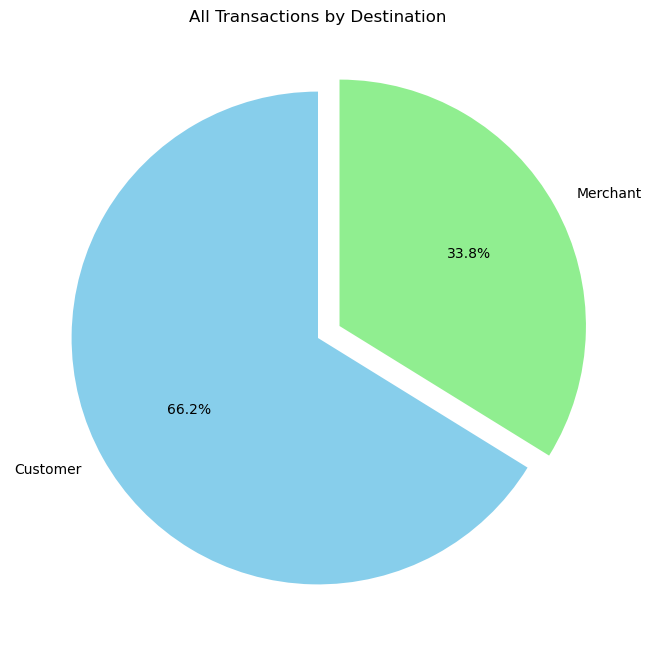

In [23]:
df_copy = df.copy();
df_copy['nameDest_first_letter'] = df_copy['nameDest'].str[0]
df_copy['nameDest_first_letter'] = df_copy['nameDest_first_letter'].replace('C', 'Customer')
df_copy['nameDest_first_letter'] = df_copy['nameDest_first_letter'].replace('M', 'Merchant')
all_by_dest = df_copy.groupby('nameDest_first_letter').size()

plt.figure(figsize=(8, 8))
plt.pie(all_by_dest, labels=all_by_dest.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'], explode=(0, 0.1))
plt.title('All Transactions by Destination')
plt.show()

 ## Analysis and exploration of categories of the "type" feature

In [24]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [25]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

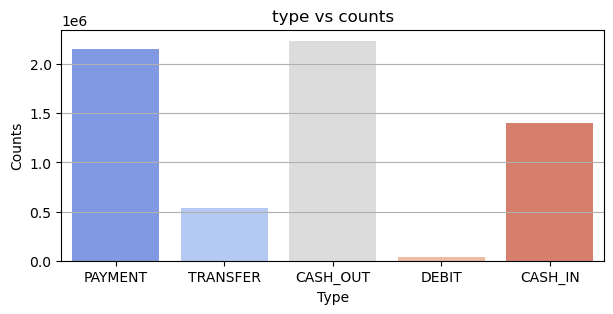

In [26]:
plt.figure(figsize=(7,3))
plt.title('type vs counts')
sns.countplot(data=df,x='type',palette='coolwarm')
plt.xlabel('Type')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=1)
plt.show()

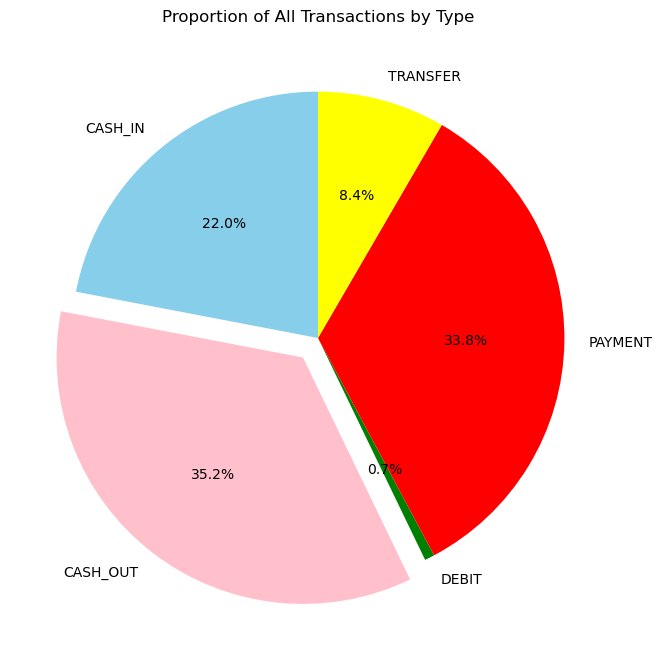

In [27]:
all_counts_by_type = df.groupby("type").size()
plt.figure(figsize=(8, 8))
plt.pie(all_counts_by_type, labels=all_counts_by_type.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink', 'green', 'red', 'yellow'], explode=(0, 0.1, 0, 0, 0))
plt.title('Proportion of All Transactions by Type')
plt.show()

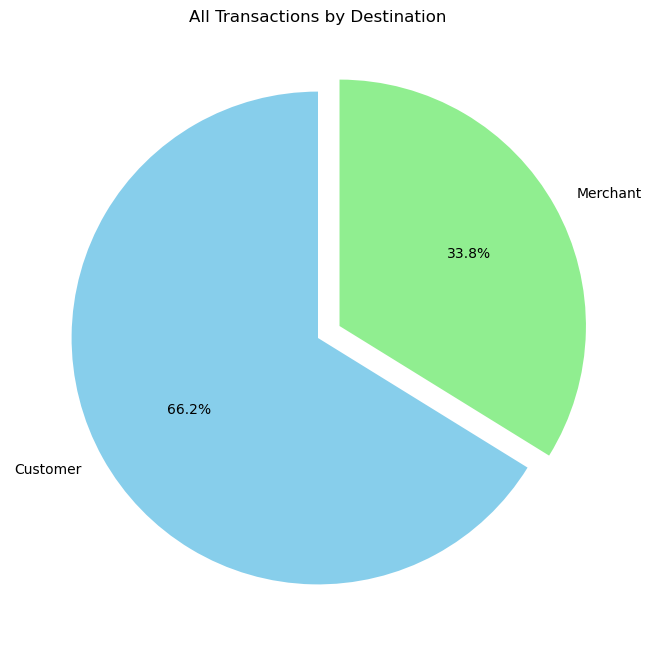

In [28]:
df_copy = df.copy();
df_copy['nameDest_first_letter'] = df_copy['nameDest'].str[0]
df_copy['nameDest_first_letter'] = df_copy['nameDest_first_letter'].replace('C', 'Customer')
df_copy['nameDest_first_letter'] = df_copy['nameDest_first_letter'].replace('M', 'Merchant')
all_by_dest = df_copy.groupby('nameDest_first_letter').size()

plt.figure(figsize=(8, 8))
plt.pie(all_by_dest, labels=all_by_dest.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'], explode=(0, 0.1))
plt.title('All Transactions by Destination')
plt.show()

In [29]:
fraud_count = df[df["isFraud"] == 1].shape[0]
non_fraud_count = df[df["isFraud"] == 0].shape[0]

print(f"Count of Fraud Transactions: {f'{fraud_count:,.0f}'}")
print(f"Count of Non-fraud Transactions: {f'{non_fraud_count:,.0f}'}")

Count of Fraud Transactions: 8,213
Count of Non-fraud Transactions: 6,354,407


In [30]:
total_transactions = fraud_count + non_fraud_count

fraud_percentage = (fraud_count / total_transactions) * 100
non_fraud_percentage = (non_fraud_count / total_transactions) * 100

print(f"Fraud Transactions percentage: {fraud_percentage:.2f}%")
print(f"Non-fraud Transactions percentage: {non_fraud_percentage:.2f}%")

Fraud Transactions percentage: 0.13%
Non-fraud Transactions percentage: 99.87%


In [31]:
total_transactions = fraud_count + non_fraud_count

fraud_percentage = (fraud_count / total_transactions) * 100
non_fraud_percentage = (non_fraud_count / total_transactions) * 100

print(f"Fraud Transactions percentage: {fraud_percentage:.2f}%")
print(f"Non-fraud Transactions percentage: {non_fraud_percentage:.2f}%")

Fraud Transactions percentage: 0.13%
Non-fraud Transactions percentage: 99.87%


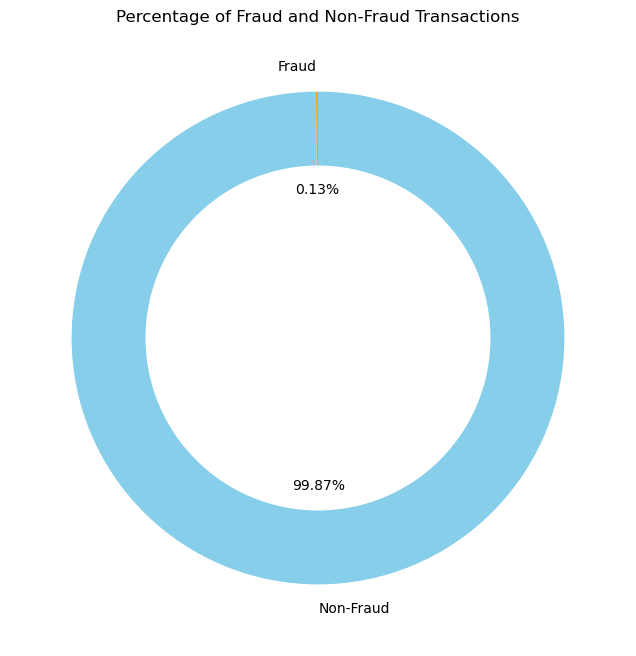

In [32]:
labels = ['Fraud', 'Non-Fraud']
sizes = [fraud_percentage, non_fraud_percentage]
colors = ['orange', 'skyblue']

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Percentage of Fraud and Non-Fraud Transactions')
plt.show()

type
CASH_OUT    4116
TRANSFER    4097
dtype: int64


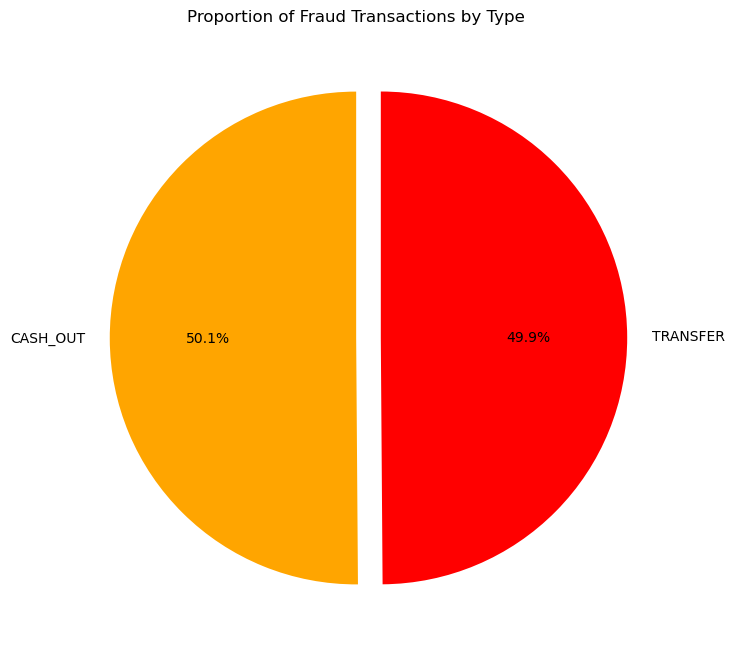

In [33]:
fraud_transactions = df[df["isFraud"] == 1]
fraud_counts_by_type = fraud_transactions.groupby("type").size()
print(fraud_counts_by_type)

plt.figure(figsize=(8, 8))
plt.pie(fraud_counts_by_type, labels=fraud_counts_by_type.index, autopct='%1.1f%%', startangle=90, colors=['orange','red'], explode=(0, 0.1))
plt.title('Proportion of Fraud Transactions by Type')
plt.show()

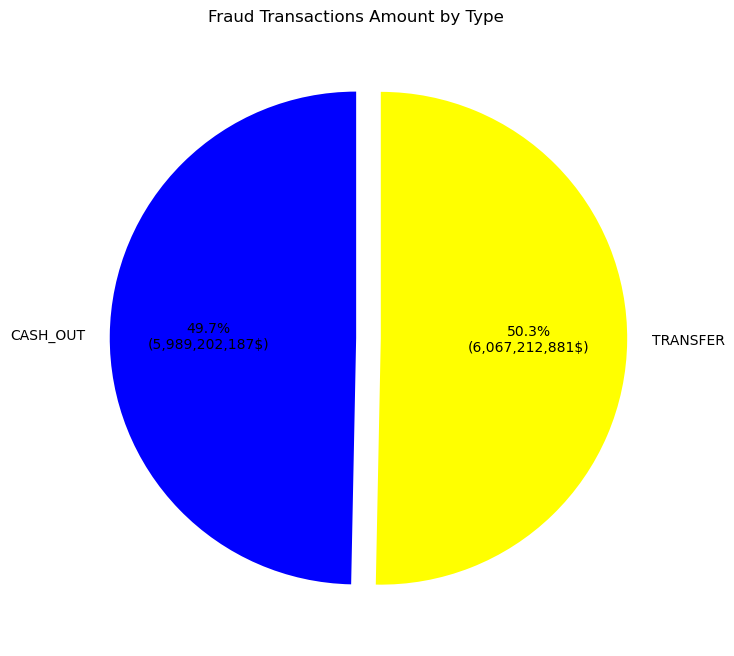

In [34]:
fraud_amounts_by_type = df[df["isFraud"] == 1].groupby("type")["amount"].sum()
plt.figure(figsize=(8, 8))
plt.pie(fraud_amounts_by_type, labels=fraud_amounts_by_type.index, autopct=lambda p: f'{p:.1f}%\n({p * sum(fraud_amounts_by_type) / 100:,.0f}$)', startangle=90, colors=['blue', 'yellow'], explode=(0, 0.1))
plt.title('Fraud Transactions Amount by Type')
plt.show()


## LABEL ENCODING

In [38]:
df['type'].replace({'CASH_OUT':0, 'PAYMENT':1, 'CASH_IN':2, 'TRANSFER':3, 'DEBIT':4}, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12792\1690466510.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['type'].replace({'CASH_OUT':0, 'PAYMENT':1, 'CASH_IN':2, 'TRANSFER':3, 'DEBIT':4}, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12792\1690466510.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent

In [39]:
df['type'].value_counts()

type
0    2237500
1    2151495
2    1399284
3     532909
4      41432
Name: count, dtype: int64

In [40]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,3,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,0,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## The "isFraud" feature

In [41]:
df['isFraud'].unique()

array([0, 1], dtype=int64)

In [42]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

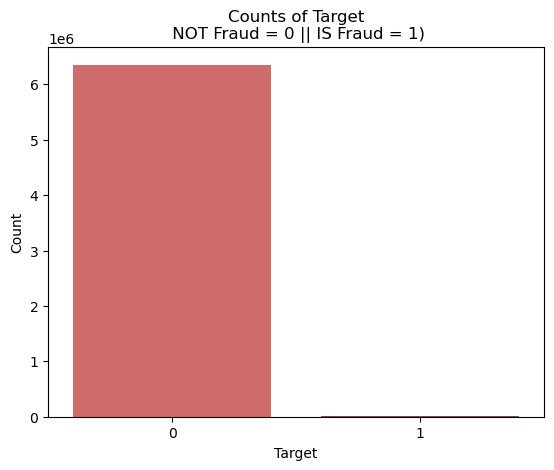

In [43]:
Target_counts = df['isFraud'].value_counts()

# Plot

sns.barplot(x=Target_counts.index, y=Target_counts.values, palette='flare')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Counts of Target\n NOT Fraud = 0 || IS Fraud = 1)')
plt.xticks()
plt.show()

# Q.How did you select variables to be included in the model?

## Selecting Variables



In [44]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [45]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [46]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,3,181.00,181.0,0.00,0.0,0.0,1,0
3,1,0,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


## Correlation

In [47]:
df.corr()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.012627,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
type,0.012627,1.000000,0.198987,0.260418,0.270669,0.066255,0.079111,0.016171,0.003144
amount,0.022373,0.198987,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,0.260418,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,0.270669,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.066255,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.079111,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.016171,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.003144,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


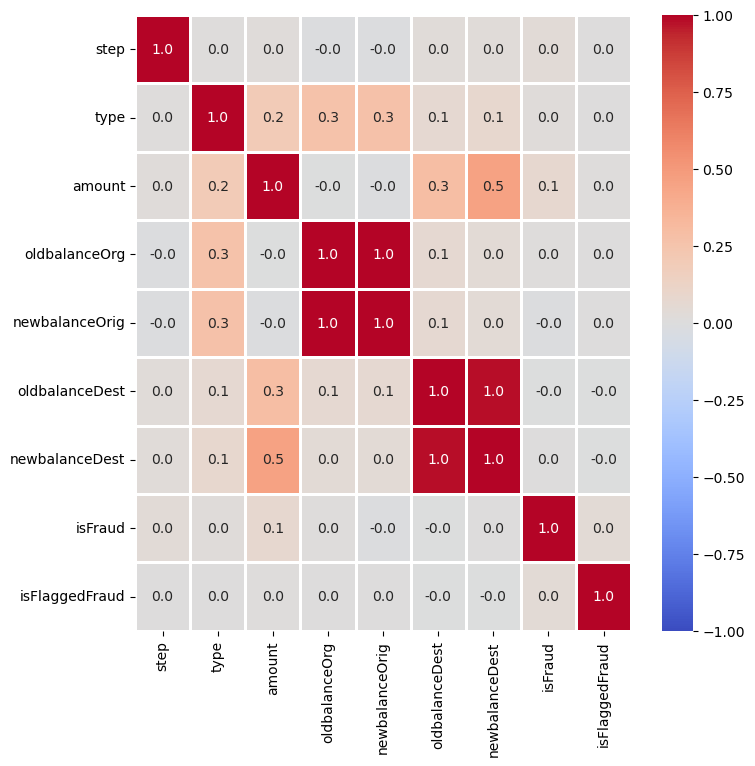

In [48]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), 
            annot=True, 
            linewidths=0.9, 
            fmt=".1f", vmin=-1, vmax=1,
            cmap='coolwarm')
plt.show()

Based on correlation matrix,drop tables with high correlation

In [49]:
df.drop(['newbalanceOrig', 'oldbalanceDest'], axis=1, inplace=True)

In [50]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [51]:
df.drop(['isFlaggedFraud', 'step'], axis=1, inplace=True)

#  Q. Describe your fraud detection model in elaboration.

## Model building

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [53]:
data=df

In [54]:
# X Data
X = data.drop(['isFraud'], axis=1)
print('X shape is : ' , X.shape)
print()

# y Data
y = data['isFraud']
print('y shape is : ' , y.shape)

X shape is :  (6362620, 4)

y shape is :  (6362620,)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (4453834, 4)
X_test shape is  (1908786, 4)
y_train shape is  (4453834,)
y_test shape is  (1908786,)


In [56]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
Model_LR = LogisticRegression()
Model_LR.fit(X_train_scaled, y_train)
y_pred_LR = Model_LR.predict(X_test_scaled)

# Quick evaluation
Train_Accuracy = Model_LR.score(X_train_scaled, y_train)
Test_Accuracy = Model_LR.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 99.87 %
Testing accuracy: 99.87 %


In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



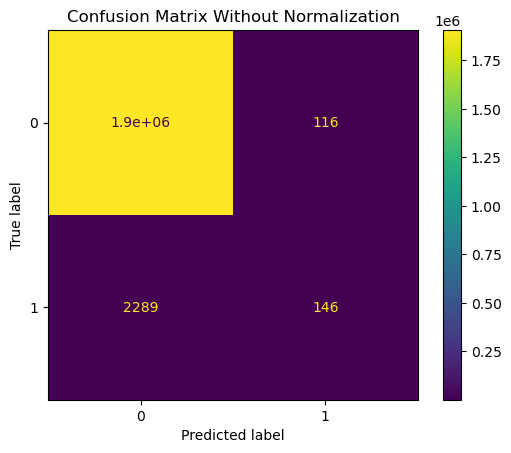

In [59]:
CM = confusion_matrix(y_true=y_test, y_pred=y_pred_LR)
ConfusionMatrixDisplay(CM, display_labels=data['isFraud'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [60]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.56      0.06      0.11      2435

    accuracy                           1.00   1908786
   macro avg       0.78      0.53      0.55   1908786
weighted avg       1.00      1.00      1.00   1908786



# Q.Demonstrate the performance of the model by using best set of tools. 

In [61]:
Accuracy_LR = accuracy_score(y_test, y_pred_LR)
print(f'➤➤➤ Accuracy Score : {Accuracy_LR * 100 : .2f} %\n')



Precision_LR = precision_score(y_test, y_pred_LR)
print(f'➤➤➤ Precision Score : {Precision_LR * 100 : .2f} %\n')



Recall_LR = recall_score(y_test, y_pred_LR)
print(f'➤➤➤ Recall Score : {Recall_LR * 100 : .2f} %\n')


F1_Score_LR = f1_score(y_test, y_pred_LR)
print(f'➤➤➤ F1 Score : {F1_Score_LR * 100 : .2f} %\n')


ROC_AUC_LR = roc_auc_score(y_test, y_pred_LR)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_LR * 100 : .2f} %\n')

➤➤➤ Accuracy Score :  99.87 %

➤➤➤ Precision Score :  55.73 %

➤➤➤ Recall Score :  6.00 %

➤➤➤ F1 Score :  10.83 %

➤➤➤ AUC_ROC :  52.99 %



## Decision Tree Algorithm

In [62]:
Model_DT = DecisionTreeClassifier()
Model_DT.fit(X_train_scaled, y_train)
y_pred_DT = Model_DT.predict(X_test_scaled)


Train_Accuracy = Model_DT.score(X_train_scaled, y_train)
Test_Accuracy = Model_DT.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 100.00 %
Testing accuracy: 99.95 %


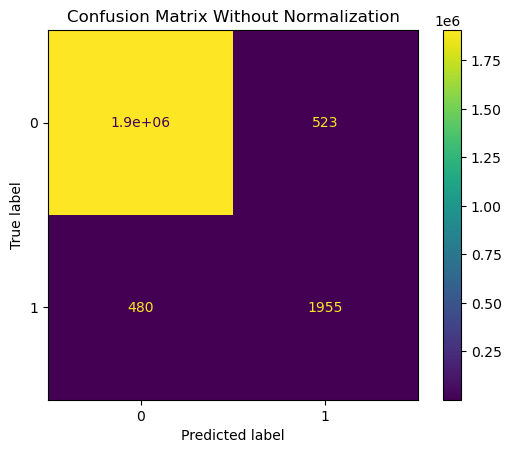

In [63]:
CM = confusion_matrix(y_true=y_test, y_pred=y_pred_DT)
ConfusionMatrixDisplay(CM, display_labels=data['isFraud'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [64]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.79      0.80      0.80      2435

    accuracy                           1.00   1908786
   macro avg       0.89      0.90      0.90   1908786
weighted avg       1.00      1.00      1.00   1908786



In [65]:
Accuracy_DT = accuracy_score(y_test, y_pred_DT)
print(f'➤➤➤ Accuracy Score : {Accuracy_DT * 100 : .2f} %\n')



Precision_DT = precision_score(y_test, y_pred_DT)
print(f'➤➤➤ Precision Score : {Precision_DT * 100 : .2f} %\n')



Recall_DT = recall_score(y_test, y_pred_DT)
print(f'➤➤➤ Recall Score : {Recall_DT * 100 : .2f} %\n')



F1_Score_DT = f1_score(y_test, y_pred_DT)
print(f'➤➤➤ F1 Score : {F1_Score_DT * 100 : .2f} %\n')


ROC_AUC_DT = roc_auc_score(y_test, y_pred_DT)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_DT * 100 : .2f} %\n')


➤➤➤ Accuracy Score :  99.95 %

➤➤➤ Precision Score :  78.89 %

➤➤➤ Recall Score :  80.29 %

➤➤➤ F1 Score :  79.58 %

➤➤➤ AUC_ROC :  90.13 %



## Naive Bayes Algorithm

In [66]:
Model_NB = GaussianNB()
Model_NB.fit(X_train_scaled, y_train)
y_pred_NB = Model_NB.predict(X_test_scaled)

# Quick evaluation
Train_Accuracy = Model_NB.score(X_train_scaled, y_train)
Test_Accuracy = Model_NB.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 98.70 %
Testing accuracy: 98.70 %


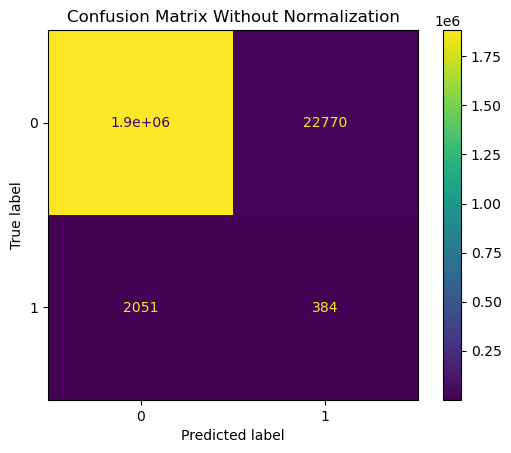

In [67]:
CM = confusion_matrix(y_true=y_test, y_pred=y_pred_NB)
ConfusionMatrixDisplay(CM, display_labels=data['isFraud'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [68]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1906351
           1       0.02      0.16      0.03      2435

    accuracy                           0.99   1908786
   macro avg       0.51      0.57      0.51   1908786
weighted avg       1.00      0.99      0.99   1908786



In [69]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_NB = accuracy_score(y_test, y_pred_NB)
print(f'➤➤➤ Accuracy Score : {Accuracy_NB * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_NB = precision_score(y_test, y_pred_NB)
print(f'➤➤➤ Precision Score : {Precision_NB * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_NB = recall_score(y_test, y_pred_NB)
print(f'➤➤➤ Recall Score : {Recall_NB * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_NB = f1_score(y_test, y_pred_NB)
print(f'➤➤➤ F1 Score : {F1_Score_NB * 100 : .2f} %\n')


ROC_AUC_NB = roc_auc_score(y_test, y_pred_NB)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_NB * 100 : .2f} %\n')

➤➤➤ Accuracy Score :  98.70 %

➤➤➤ Precision Score :  1.66 %

➤➤➤ Recall Score :  15.77 %

➤➤➤ F1 Score :  3.00 %

➤➤➤ AUC_ROC :  57.29 %



In [74]:
accuracy_scores = {
    'Model': ['Decision Tree', 'Naive Bayes', 'Logistic Regression'],
    'Accuracy (%)': [95.00, Train_Accuracy * 100, Accuracy_LR * 100],  
}
evaluation_df = pd.DataFrame(accuracy_scores)
print(evaluation_df)

                 Model  Accuracy (%)
0        Decision Tree     95.000000
1          Naive Bayes     98.698402
2  Logistic Regression     99.874004


# Q.What kind of prevention should be adopted while company update its infrastructure?

When updating infrastructure, companies should adopt several preventive measures to ensure security and stability. Conducting a comprehensive risk assessment helps identify potential vulnerabilities, while implementing robust data backup and recovery plans protects against data loss. Applying security patches and updates is crucial to address known vulnerabilities, and strengthening access controls with multi-factor authentication reduces unauthorized access risks. Extensive testing in a staging environment ensures the new infrastructure meets security and performance standards. Continuous monitoring and logging enable real-time detection of anomalies, and assessing vendor and third-party security practices ensures compliance with standards. These measures collectively safeguard the infrastructure update process.

# Q.Assuming these actions have been implemented, how would you determine if they work?

To determine if the preventive measures implemented during an infrastructure update are effective, you should conduct comprehensive testing and validation, including performance and security tests. Regularly review monitoring and logging systems to detect any unusual activities or security incidents, and ensure that alerts and logs are functioning correctly. Simulate security incidents and disaster recovery scenarios to evaluate the effectiveness of response protocols. Perform audits and compliance checks to confirm adherence to industry standards and regulations, and gather feedback from users to identify any issues or disruptions. Finally, continuously update and refine security measures based on new threats and best practices to ensure ongoing effectiveness and security.